In [27]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

data = pd.read_csv('/Users/xiaotingzhong/Documents/Matlab/Grain Tracking/190318_mig_signs.txt', header=0)

In [95]:
X = data.iloc[:, 2:-1]
y = data.iloc[:, -1]

mask = data.iloc[:, :2]
mask.dtype=bool
mask_general_faces = (mask.iloc[:,0] & mask.iloc[:,1]).values.astype(bool)
X = X.iloc[:, [0,3,5]]
X = X[mask_general_faces]
y = y[mask_general_faces]


# eps = 1e-2
# mask_pos = (y > eps)
# mask_neg = (y < -eps)
# sign = pd.Series(np.zeros(X.shape[0]), name = 'motion_sign')
# sign[mask_pos] = 'pos'
# sign[mask_neg] = 'neg'
# sign[sign==0] = 'stable'
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4984 entries, 0 to 7003
Data columns (total 3 columns):
 gsize_diff_an4           4984 non-null float64
 face_itgcurv_an4_left    4984 non-null float64
 fnnf_maxdec_r_m_l        4984 non-null float64
dtypes: float64(3)
memory usage: 155.8 KB


### Random Forest

In [98]:
print np.sum(y == 0)
print np.sum(y == 1)
print np.sum(y == -1)

770
2200
2014


0.6569020866773676
[0.60653792 0.28142015 0.11204192]


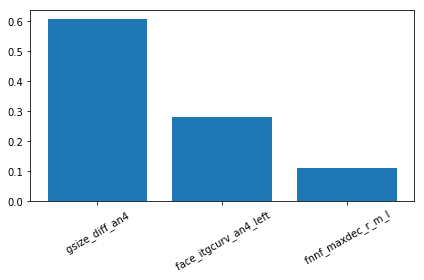

In [97]:
clf = RandomForestClassifier(n_estimators=1000, max_depth=2, random_state=0)
clf.fit(X, y)
print clf.score(X, y)
print clf.feature_importances_

p1 = plt.bar(np.arange(X.shape[1]), clf.feature_importances_)

plt.xticks(np.arange(X.shape[1]), X.columns.values)
plt.xticks(rotation=30)
plt.tight_layout()

f_name = 'all_data_acc_65_69.png'
plt.savefig(f_name, dpi=300)

,gsize_diff_an4,gf_diff_an4,g_itgcurv_diff_an4,face_itgcurv_an4_left,face_area_an4_m_an5,fnnf_maxdec_r_m_l,fnnf_avgdec_r_m_l
0,-8.644,-5.0,246.302,2.720,5.326,1141.322,320.953
1,14.956,6.0,333.134,46.920,-76.871,1185.237,4.044
2,7.437,4.0,248.194,-5.002,-38.908,21.838,-401.808
3,-6.861,11.0,126.486,-11.796,56.489,1966.832,838.653
4,-55.957,-13.0,-268.755,-84.628,86.440,-310.115,-337.336
6,-28.738,-6.0,-126.027,1.280,205.708,1809.168,313.990
7,0.352,14.0,286.467,-3.113,-66.325,2540.157,563.340
8,11.403,7.0,156.110,11.311,172.344,2030.586,458.565
9,-9.714,3.0,-238.385,4.708,126.467,2479.318,756.320
10,10.716,12.0,49.013,120.042,110.254,2761.608,507.188


### Logistic Regression

In [ ]:
import statsmodels.api as sm
import statsmodels.api as st

dummy_sign = pd.get_dummies(sign)

X_sm = st.add_constant(X.iloc[:,[0]])
logit = st.MNLogit(dummy_sign.values, X_sm.values)

result = logit.fit()





In [ ]:
# import statsmodels.api as st
# iris = st.datasets.get_rdataset('iris', 'datasets')
# y = iris.data.Species
# x = iris.data.ix[:, 0]
# x = st.add_constant(x, prepend = False)

# mdl = st.MNLogit(y, x)
# mdl_fit = mdl.fit()
# print mdl_fit.summary2()

X.iloc[:,[0,-1]]
